In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [74]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

## Perform API Calls

In [75]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create settings dictionary with information we're interested in
#settings = {"units": "Imperial", "appid": api_key}

# Get current weather
#current_weather_city = owm.get_current(cities[0], **settings)
#print(f"Current weather object for {cities[0]}: {current_weather_city}.")

In [76]:
#current_weather_city["main"]["humidity"]
#current_weather_city["main"]["temp_max"]

In [77]:
#current_weather_city["main"]

In [78]:
#City          current_weather_city["name"]
#Cloudiness    current_weather_city["clouds"]["all"] 
#Country       current_weather_city["sys"]["country"]
#Date          current_weather_city["dt"]
#Humidity      current_weather_city["main"]["humidity"] 
#Lat           current_weather_city["coord"]["lat"]
#Lng           current_weather_city["coord"]["lon"]
#Max Temp      current_weather_city["main"]["temp_max"]
#Wind Speed    current_weather_city["wind"]["speed"]

In [79]:
weather_data = {
    'City':[],
    'Country':[],
    'Date':[],
    'Cloudiness':[],
    'Lat':[],
    'Lng':[],
    'Humidity':[],
    'Max Temp':[],
    'Wind Speed':[]
}
for city in cities:  
    #current_weather_city = owm.get_current(city, **settings)
    try:
        city_url = url + "&q=" + city
        # Get weather data
        weather_response = requests.get(city_url)
        current_weather_city = weather_response.json()
        weather_data["City"].append(current_weather_city["name"])
        weather_data["Cloudiness"].append(current_weather_city["clouds"]["all"])
        weather_data["Country"].append(current_weather_city["sys"]["country"])
        weather_data["Date"].append(current_weather_city["dt"])
        weather_data["Humidity"].append(current_weather_city["main"]["humidity"]) 
        weather_data["Lat"].append(current_weather_city["coord"]["lat"])
        weather_data["Lng"].append(current_weather_city["coord"]["lon"])
        weather_data["Max Temp"].append(current_weather_city["main"]["temp_max"])
        weather_data["Wind Speed"].append(current_weather_city["wind"]["speed"])
    except KeyError:
        print("Oops, that key doesn't exist")



Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key doesn't exist
Oops, that key

In [80]:
weather_data
df = pd.DataFrame(weather_data)
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Ushuaia,80,AR,1529823692,100,-54.81,-68.31,24.31,2.57
1,Wewak,56,PG,1529823693,79,-3.55,143.63,82.27,2.91
2,Paamiut,48,GL,1529823693,99,61.99,-49.67,37.00,7.94
3,Souillac,0,FR,1529821800,67,45.60,-0.60,62.60,10.29
4,Kapaa,40,US,1529820360,78,22.08,-159.32,78.80,19.46
5,Hithadhoo,68,MV,1529823694,100,-0.60,73.08,81.82,5.82
6,Albany,90,US,1529820000,82,42.65,-73.75,62.60,5.82
7,Harlingen,75,US,1529822100,88,26.19,-97.70,82.40,14.99
8,Tiksi,36,RU,1529823696,69,71.64,128.87,74.17,2.68
9,Meulaboh,76,ID,1529823696,100,4.14,96.13,83.17,2.91


In [81]:
len(df["City"])

562

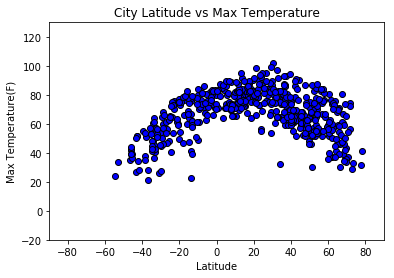

In [86]:
# Tell matplotlib to create a scatter plot based upon the above data
# Set the upper and lower limits of our y axis
plt.ylim(-20,130)
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(F)")
plt.scatter(df["Lat"], df["Max Temp"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig("../Images/LatvsMaxTemp.png")
plt.show()

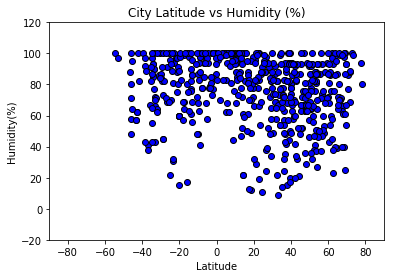

In [87]:
# Tell matplotlib to create a scatter plot based upon the above data
# Set the upper and lower limits of our y axis
plt.ylim(-20,120)
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.scatter(df["Lat"], df["Humidity"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig("../Images/LatvsHumidity.png")
plt.show()

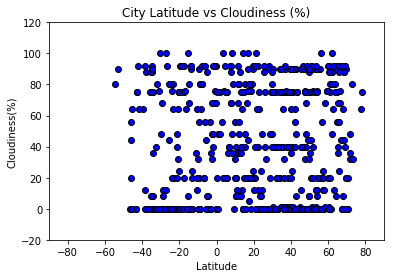

In [88]:
# Tell matplotlib to create a scatter plot based upon the above data
# Set the upper and lower limits of our y axis
plt.ylim(-20,120)
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.scatter(df["Lat"], df["Cloudiness"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig("../Images/LatvsCloudiness.png")
plt.show()

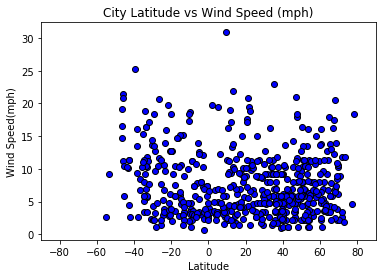

In [89]:
# Tell matplotlib to create a scatter plot based upon the above data
# Set the upper and lower limits of our y axis
#plt.ylim(-20,120)
# Set the upper and lower limits of our x axis
plt.xlim(-90,90)
# Create a title, x label, and y label for our chart
plt.title("City Latitude vs Wind Speed (mph)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.scatter(df["Lat"], df["Wind Speed"], marker="o", facecolors="blue", edgecolors="black")
plt.savefig("../Images/LatvsWindSpeed.png")
plt.show()

In [95]:
df.to_csv(output_data_file)

In [ ]:
#Observed Trends:
# It tends to be hotter near latitude 0 which is the equator!
# Cities in northern hemisphere tend to experience higher levels of humidity compared to southern hemisphere
# Most cities tend to experience on an average 0-15mph winds